In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
import tensorflow
import joblib
from sklearn.preprocessing import StandardScaler

2025-04-10 11:42:55.142553: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 11:42:55.143092: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 11:42:55.145479: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-10 11:42:55.153154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744285375.163590 1175249 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744285375.16

In [10]:
data_set = pd.read_csv("data.csv")
data_set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [11]:
data_set.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
data_set.drop(columns=['Unnamed: 32','id'], axis=1, inplace=True)

/tmp/ipykernel_1175249/3219315467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=data_set, palette='magma')


<Axes: xlabel='diagnosis', ylabel='count'>

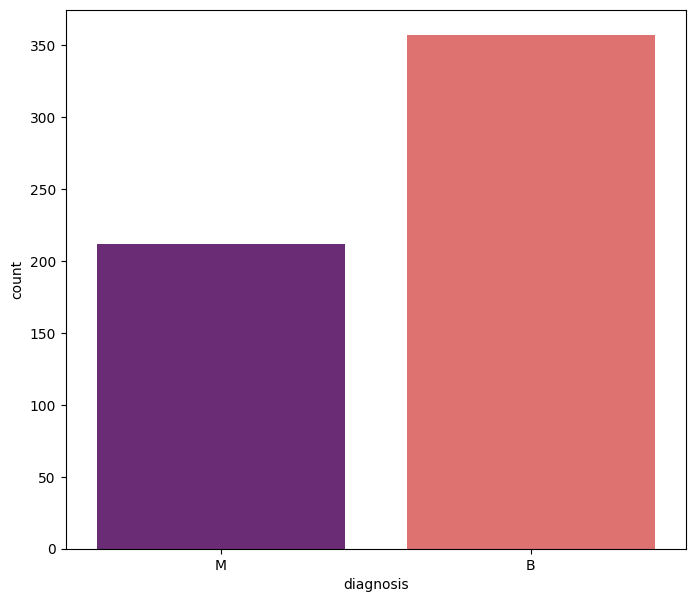

In [13]:
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=data_set, palette='magma')

In [14]:
data_set_one = data_set.drop('diagnosis', axis=1)
data_set_one

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: >

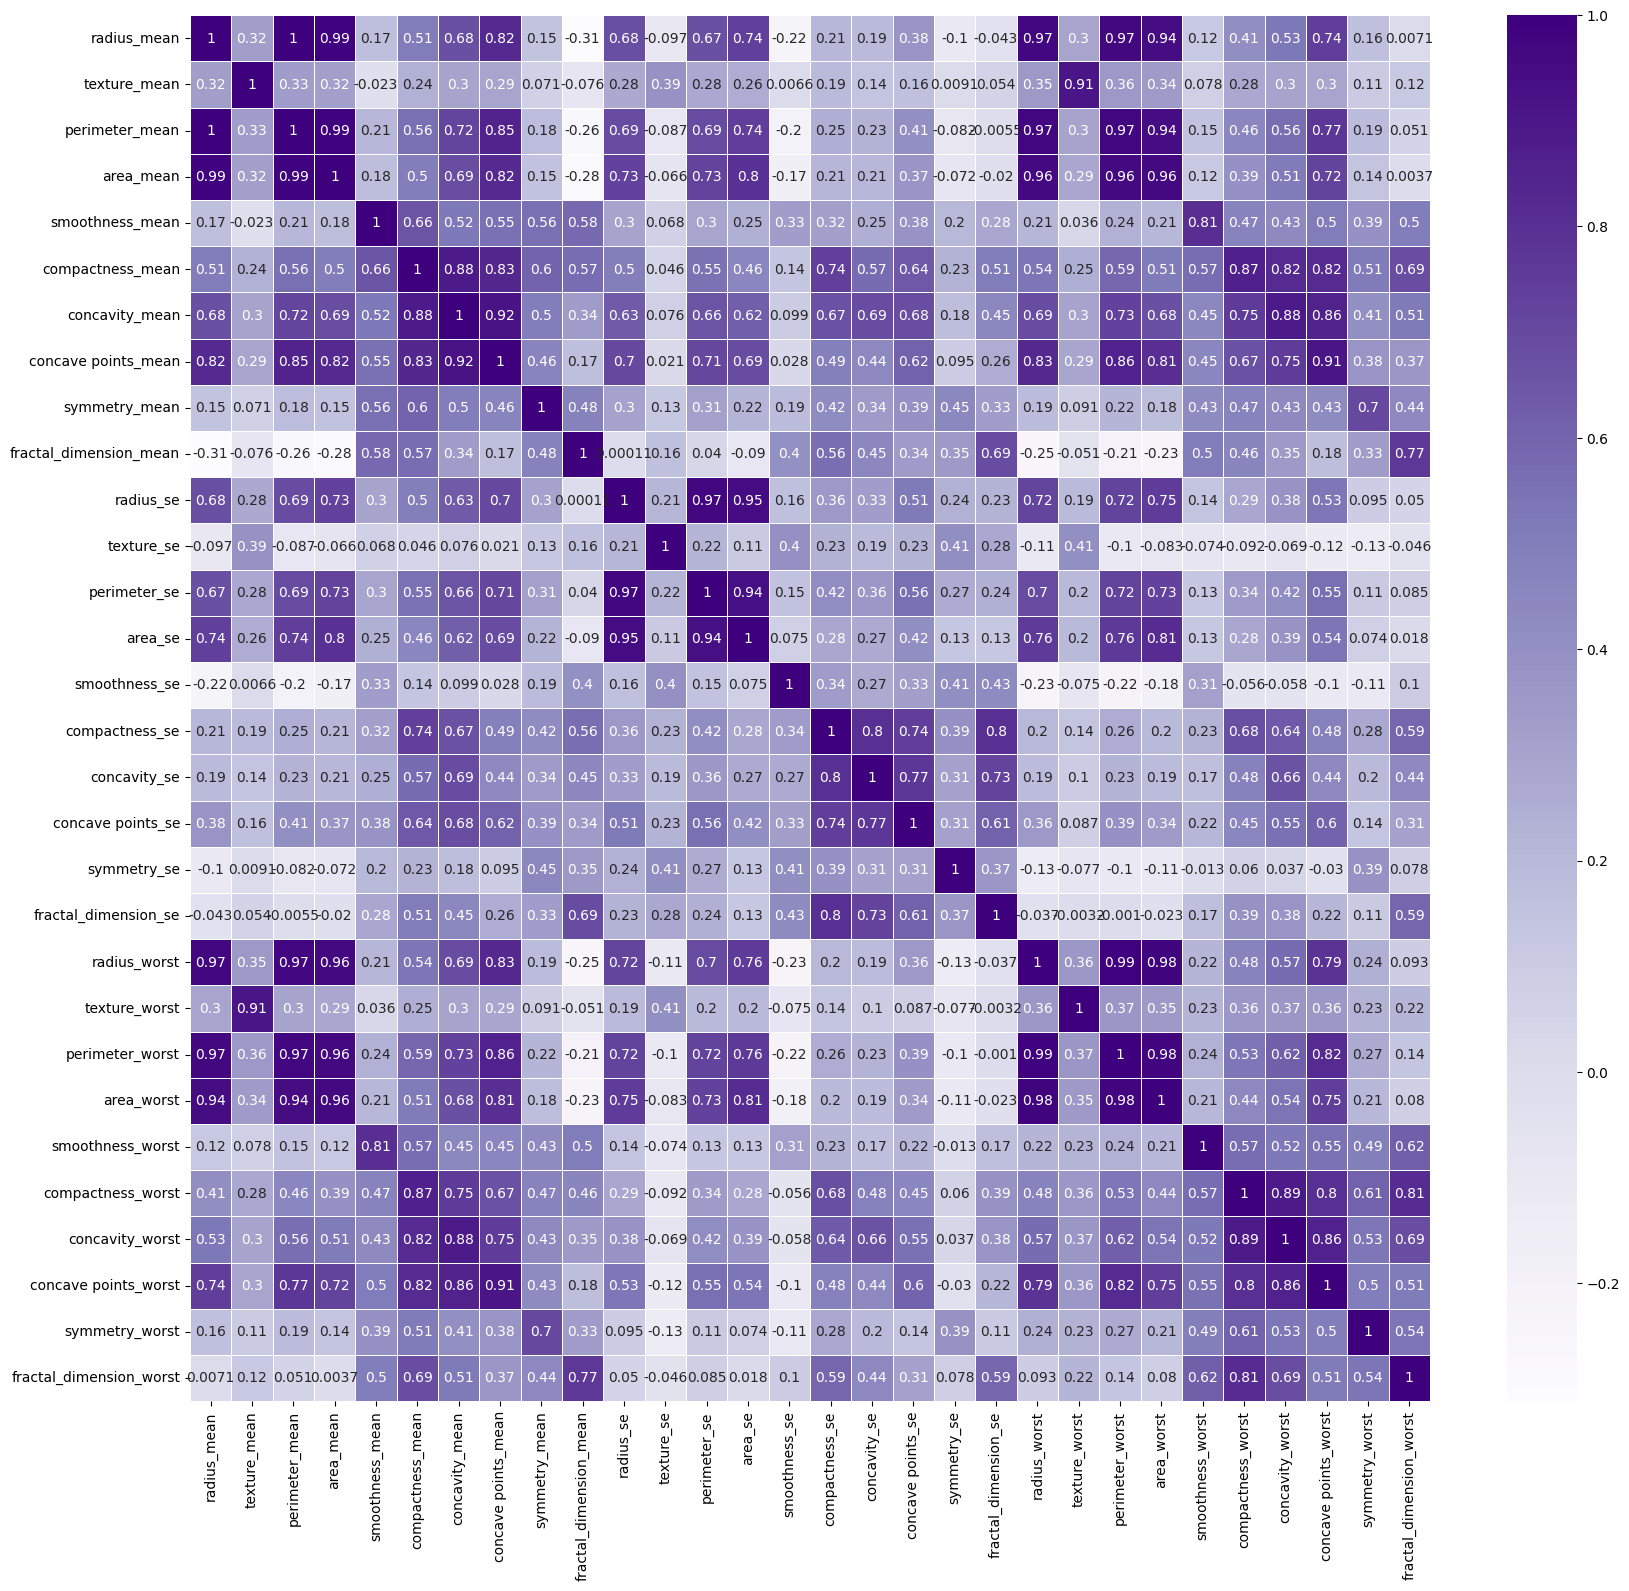

In [15]:
plt.figure(figsize=(20,18))
sns.heatmap(data_set_one.corr(), annot=True,linewidths=.5, cmap="Purples")

In [16]:
data_set['diagnosis']=data_set['diagnosis'].map({'B':0,'M':1})

In [17]:
data_set['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
                data_set.drop('diagnosis', axis=1),
                data_set['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print(X_test)


Shape of training set: (455, 30)
Shape of test set: (114, 30)
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
204        12.47         18.60           81.09      481.9          0.09965   
70         18.94         21.31          123.60     1130.0          0.09009   
131        15.46         19.48          101.70      748.9          0.10920   
431        12.40         17.68           81.47      467.8          0.10540   
540        11.54         14.44           74.65      402.9          0.09984   
..           ...           ...             ...        ...              ...   
486        14.64         16.85           94.21      666.0          0.08641   
75         16.07         19.65          104.10      817.7          0.09168   
249        11.52         14.93           73.87      406.3          0.10130   
238        14.22         27.85           92.55      623.9          0.08223   
265        20.73         31.12          135.70     1419.0          0.09469   

 

In [19]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

# Classification Models

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions1 = logreg.predict(X_test)

In [22]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions1))
print('\n')
print(classification_report(y_test, predictions1))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [23]:
print(y_test)
print(predictions1)

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [24]:
logreg_acc = accuracy_score(y_test, predictions1)
print("Accuracy of the Logistic Regression Model is: ", logreg_acc)

Accuracy of the Logistic Regression Model is:  0.9824561403508771


K Nearest Neighbours

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
error_rate = []
for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x70deeb7c6840>
Traceback (most recent call last):
  File "/home/wecode-016/RenduData/C-DAT-700-ABJ-2-2-bigdata-fawasi.shittu/.venv/lib/python3.12/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/wecode-016/RenduData/C-DAT-700-ABJ-2-2-bigdata-fawasi.shittu/.venv/lib/python3.12/site-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/home/wecode-016/RenduData/C-DAT-700-ABJ-2-2-bigdata-fawasi.shittu/.venv/lib/python3.12/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in 

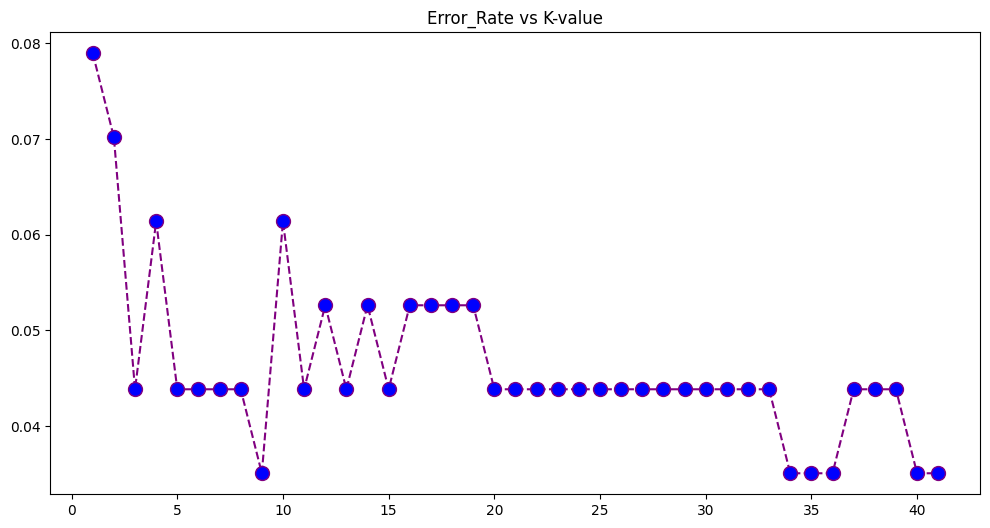

In [27]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [29]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[69  2]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [30]:
knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.9649122807017544


# Random Forests

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)

In [33]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions4))
print("\n")
print(classification_report(y_test, predictions4))

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [34]:
rfc_acc = accuracy_score(y_test, predictions4)
print("Accuracy of Random Forests Model is: ", rfc_acc)

Accuracy of Random Forests Model is:  0.9649122807017544


Support Vector Machines (SVM)

In [35]:
from sklearn.svm import SVC

In [36]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
predictions5 = svc_model.predict(X_test)

In [37]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [38]:
svm_acc = accuracy_score(y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.9824561403508771


Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [41]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'random'}

In [42]:
grid_search_dt.best_score_

np.float64(0.9626373626373625)

In [43]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter = 'random')

In [44]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [45]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9473684210526315
[[69  2]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [46]:
# Sauvegarde du modèle
import joblib
joblib.dump(logreg, "breast_cancer_model.pkl")

['breast_cancer_model.pkl']

In [47]:
predictions1

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])